# Lab 2
### *C4.5 decicion tree* vs *naive bayes classification*
breast-cancer.arff



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib
import graphviz
import sklearn as sk

from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


##### Dataset Loading

In [2]:
data = arff.loadarff('breast-cancer.arff')
df = pd.DataFrame(data[0]).select_dtypes([np.object]).stack().str.decode('utf-8').unstack()
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


Since we have some patterns with missiong values, we decided to eliminate them from the dataset

In [30]:
df.iloc[20:21,] # row with missing data

In [30]:
df = df[(df['node-caps'] != '?') & (df['breast-quad'] != '?')]

Now we transform the dataset by factorizing it, so to replace the string values for the features to numbers

In [8]:
cats = {}
codes, cats['age'] = pd.factorize(df['age'])
df.loc[:,'age'] = codes
codes, cats['menopause'] = pd.factorize(df['menopause'])
df.loc[:,'menopause'] = codes
codes, cats['tumor-size'] = pd.factorize(df['tumor-size'])
df.loc[:,'tumor-size'] = codes
codes, cats['inv-nodes'] = pd.factorize(df['inv-nodes'])
df.loc[:,'inv-nodes'] = codes
codes, cats['node-caps'] = pd.factorize(df['node-caps'])
df.loc[:,'node-caps'] = codes
codes, cats['breast'] = pd.factorize(df['breast'])
df.loc[:,'breast'] = codes
codes, cats['breast-quad'] = pd.factorize(df['breast-quad'])
df.loc[:,'breast-quad'] = codes
codes, cats['irradiat'] = pd.factorize(df['irradiat'])
df.loc[:,'irradiat'] = codes
codes, cats['Class'] = pd.factorize(df['Class'])
df.loc[:,'Class'] = codes
df.loc[:,'deg-malig'] = df['deg-malig'].astype(int)


Now we can compute the correlation matrix 

In [31]:
corrMat = df.corr()
corrMat.style.background_gradient(cmap='coolwarm')

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
age,1.000000,0.242579,-0.031988,-0.029323,0.036850,-0.019273,0.073121,-0.018384,-0.029499,-0.023966
menopause,0.242579,1.000000,0.006746,-0.035095,0.048569,0.040020,0.059217,-0.092046,-0.093481,0.087480
tumor-size,-0.031988,0.006746,1.000000,-0.105610,0.078192,-0.103100,-0.020722,-0.047194,0.005344,0.079440
inv-nodes,-0.029323,-0.035095,-0.105610,1.000000,-0.632495,0.333198,0.021855,0.080266,0.370313,-0.317881
node-caps,0.036850,0.048569,0.078192,-0.632495,1.000000,-0.330181,-0.012345,-0.043770,-0.333537,0.289002
deg-malig,-0.019273,0.040020,-0.103100,0.333198,-0.330181,1.000000,0.045874,-0.040290,0.230821,-0.330253
breast,0.073121,0.059217,-0.020722,0.021855,-0.012345,0.045874,1.000000,0.168374,-0.025230,-0.041304
breast-quad,-0.018384,-0.092046,-0.047194,0.080266,-0.043770,-0.040290,0.168374,1.000000,-0.006060,-0.055458
irradiat,-0.029499,-0.093481,0.005344,0.370313,-0.333537,0.230821,-0.025230,-0.006060,1.000000,-0.226020
Class,-0.023966,0.087480,0.079440,-0.317881,0.289002,-0.330253,-0.041304,-0.055458,-0.226020,1.000000


By this results we can say that age and breast appear not to be correlated to much with the target class. So we will try to eliminate those features from the dataset and see if we could get any improvements.

In [10]:
#Splitting the target class from the features
df.head()
Y = df['Class']
X = df.iloc[:,:-1]

Functions for reduction, permutation and splitting of the dataset

In [15]:
def reducedDatasets (X,Y) :

    #Datasets with feature reduction
    X_breast = X[X.columns.difference(['age'])]
    X_age = X[X.columns.difference(['breast'])]
    X_breast_age = X[X.columns.difference(['age','breast'])]

    
    return X,X_breast,X_age,X_breast_age,Y

def permuteDataset(X,Y) :
    m = X.shape[0]
    permutation = np.random.permutation(m) # random permutation

    X = X.iloc[permutation]
    Y = Y.iloc[permutation]
    return X,Y

def splitDataset (X,Y,ratio) :
    
    #patterns in the test set
    m = X.shape[0]
    m_training = round(m*ratio)
    m_test = m-m_training
    X_training = []
    Y_training = []
    X_test = []
    Y_test = []
    #X_training = instances for training set
    X_training = X[0:m_training] 

    #Y_training = labels for the training set
    Y_training = Y[0:m_training]

    #X_test = instances for test set
    X_test = X[m_training-1:-1]

    #Y_test = labels for the test set
    Y_test = Y[m_training-1:-1]
    
    return X_training,Y_training,X_test,Y_test

### Decision Tree implementation

In [32]:

#without features reduction
clf = tree.DecisionTreeClassifier()
X_training,Y_training,X_test,Y_test = splitDataset(X,Y,0.8)
clf = clf.fit(X_training, Y_training)


In [33]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("decisiontree")

'decisiontree.pdf'

In [34]:
#without age
X_training_age= X_training[X_training.columns.difference(['age'])]
X_test_age= X_test[X_test.columns.difference(['age'])]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_training_age, Y_training)
acc = clf.score( X_test_age, Y_test)

print(acc)

0.6


In [19]:
#without breast
X_training_breast= X_training[X_training.columns.difference(['breast'])]
X_test_breast= X_test[X_test.columns.difference(['age'])]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_training_breast, Y_training)
acc = clf.score( X_test_breast, Y_test)

print(acc)

0.7108433734939759


In [20]:
#without age & breast
X_training_age_breast= X_training[X_training.columns.difference(['age','breast'])]
X_test_age_breast= X_test[X_test.columns.difference(['age','breast'])]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_training_age_breast, Y_training)
acc = clf.score( X_test_age_breast, Y_test)

print(acc)

0.7228915662650602


### Cross Validation results

In [45]:
nFolds= 10

In [46]:
#No feature reduction
clf = tree.DecisionTreeClassifier()
accs=cross_val_score(clf, X, Y, cv=nFolds)
np.average(accs)

0.6284391534391535

In [47]:
clf = tree.DecisionTreeClassifier()
accs_age=cross_val_score(clf, X_age, Y, cv=nFolds)
np.average(accs_age)

NameError: name 'X_age' is not defined

In [48]:
clf = tree.DecisionTreeClassifier()
accs_breast=cross_val_score(clf, X_breast, Y, cv=nFolds)
np.average(accs_breast)

NameError: name 'X_breast' is not defined

In [526]:
clf = tree.DecisionTreeClassifier()
accs_breast_age=cross_val_score(clf, X_breast_age, Y, cv=nFolds)
np.average(accs_breast_age)

0.6537037037037037

### ATTENTION !!
##### This code is a batch computation, it' very heavy and takes a lot of time to compute, don't execute it if not necessary.

In [27]:
nFolds= 10
nPermutation = 100
nTrials = 50
avgAccs = np.zeros( (4, nPermutation, nTrials) )
for p in range(nPermutation) :
    print("Permutation " + str(p))
    X, X_breast ,X_age, X_breast_age, Y = reducedDatasets ()
    for t in range(nTrials) :
        clf = tree.DecisionTreeClassifier()
        avgAccs[0,p,t] = np.average(cross_val_score(clf, X, Y, cv=nFolds))
        clf = tree.DecisionTreeClassifier()
        avgAccs[1,p,t] = np.average(cross_val_score(clf, X_age, Y, cv=nFolds))
        clf = tree.DecisionTreeClassifier()
        avgAccs[2,p,t] = np.average(cross_val_score(clf, X_breast, Y, cv=nFolds))
        clf = tree.DecisionTreeClassifier()
        avgAccs[3,p,t] = np.average(cross_val_score(clf, X_breast_age, Y, cv=nFolds))     

Permutation 0
Permutation 1
Permutation 2
Permutation 3
Permutation 4
Permutation 5
Permutation 6
Permutation 7
Permutation 8
Permutation 9
Permutation 10
Permutation 11
Permutation 12
Permutation 13
Permutation 14
Permutation 15
Permutation 16
Permutation 17
Permutation 18
Permutation 19
Permutation 20
Permutation 21
Permutation 22
Permutation 23
Permutation 24
Permutation 25
Permutation 26
Permutation 27
Permutation 28
Permutation 29
Permutation 30
Permutation 31
Permutation 32
Permutation 33
Permutation 34
Permutation 35
Permutation 36
Permutation 37
Permutation 38
Permutation 39
Permutation 40
Permutation 41
Permutation 42
Permutation 43
Permutation 44
Permutation 45
Permutation 46
Permutation 47
Permutation 48
Permutation 49
Permutation 50
Permutation 51
Permutation 52
Permutation 53
Permutation 54
Permutation 55
Permutation 56
Permutation 57
Permutation 58
Permutation 59
Permutation 60
Permutation 61
Permutation 62
Permutation 63
Permutation 64
Permutation 65
Permutation 66
Permu

In [529]:
print("NORMAL DATASET   acc: " + str(np.average(np.average(avgAccs[0,:,:]))))
print("NO AGE           acc: " + str(np.average(np.average(avgAccs[1,:,:]))))
print("NO BREAST        acc: " + str(np.average(np.average(avgAccs[2,:,:]))))
print("NO AGE & BREAST  acc: " + str(np.average(np.average(avgAccs[3,:,:]))))

NORMAL DATASET   acc: 0.6461523544973544
NO AGE           acc: 0.6481156084656085
NO BREAST        acc: 0.655572037037037
NO AGE & BREAST  acc: 0.66392


From the results above we can confidently say that age and breast are not so importanto for the classification problem when decision tree is used.

##### Cofusion matrix for decsion tree with feature reduction

NORMAL
NO AGE
NO BREAST
NO AGE&BREAST


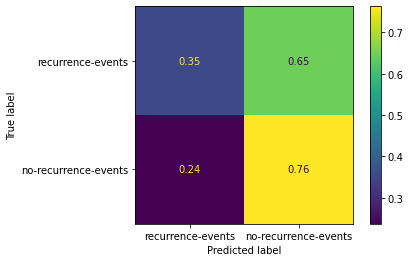

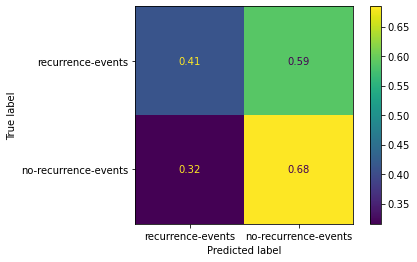

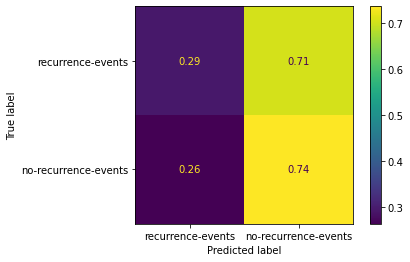

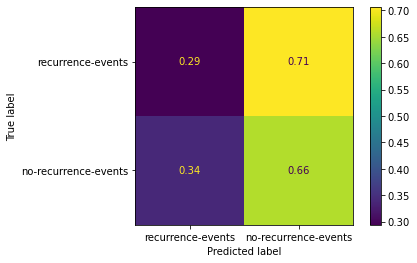

In [27]:
clf = tree.DecisionTreeClassifier()
Y = df['Class']
X = df.iloc[:,:-1]
X,Y = permuteDataset(X,Y)
X,X_breast,X_age,X_breast_age,Y = reducedDatasets (X,Y)
X_train,Y_train,X_test,Y_test = splitDataset(X,Y,0.8)
X_train_a,Y_train_a,X_test_a,Y_test_a = splitDataset(X_age,Y,0.8)
X_train_b,Y_train_b,X_test_b,Y_test_b = splitDataset(X_breast,Y,0.8)
X_train_ab,Y_train_ab,X_test_ab,Y_test_ab = splitDataset(X_breast_age,Y,0.8)

print("NORMAL")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
sk.metrics.plot_confusion_matrix(clf, X_test, Y_test,normalize='true', display_labels = cats['Class'])

print("NO AGE")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_a, Y_train_a)
sk.metrics.plot_confusion_matrix(clf, X_test_a, Y_test_a,normalize='true', display_labels = cats['Class'])

print("NO BREAST")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_b, Y_train_b)
sk.metrics.plot_confusion_matrix(clf, X_test_b, Y_test_b,normalize='true', display_labels = cats['Class'])

print("NO AGE&BREAST")
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_ab, Y_train_ab)
sk.metrics.plot_confusion_matrix(clf, X_test_ab, Y_test_ab,normalize='true', display_labels = cats['Class'])

### Nyve Bayas implementation


### ATTENTION !!
##### This code is a batch computation, it' very heavy and takes a lot of time to compute, don't execute it if not necessary.

In [559]:
nFolds= 10
nPermutation = 100
nTrials = 50
avgAccsBayes = np.zeros( (4, nPermutation, nTrials) )
for p in range(nPermutation) :
    print("Permutation " + str(p))
    X, X_breast ,X_age, X_breast_age, Y = reducedDatasets ()
    for t in range(nTrials) :
        clf = GaussianNB()
        avgAccsBayes[0,p,t] = np.average(cross_val_score(clf, X, Y, cv=nFolds))
        clf = GaussianNB()
        avgAccsBayes[1,p,t] = np.average(cross_val_score(clf, X_age, Y, cv=nFolds))
        clf = GaussianNB()
        avgAccsBayes[2,p,t] = np.average(cross_val_score(clf, X_breast, Y, cv=nFolds))
        clf = GaussianNB()
        avgAccsBayes[3,p,t] = np.average(cross_val_score(clf, X_breast_age, Y, cv=nFolds))    

Permutation 0
Permutation 1
Permutation 2
Permutation 3
Permutation 4
Permutation 5
Permutation 6
Permutation 7
Permutation 8
Permutation 9
Permutation 10
Permutation 11
Permutation 12
Permutation 13
Permutation 14
Permutation 15
Permutation 16
Permutation 17
Permutation 18
Permutation 19
Permutation 20
Permutation 21
Permutation 22
Permutation 23
Permutation 24
Permutation 25
Permutation 26
Permutation 27
Permutation 28
Permutation 29
Permutation 30
Permutation 31
Permutation 32
Permutation 33
Permutation 34
Permutation 35
Permutation 36
Permutation 37
Permutation 38
Permutation 39
Permutation 40
Permutation 41
Permutation 42
Permutation 43
Permutation 44
Permutation 45
Permutation 46
Permutation 47
Permutation 48
Permutation 49
Permutation 50
Permutation 51
Permutation 52
Permutation 53
Permutation 54
Permutation 55
Permutation 56
Permutation 57
Permutation 58
Permutation 59
Permutation 60
Permutation 61
Permutation 62
Permutation 63
Permutation 64
Permutation 65
Permutation 66
Permu

In [560]:
print("NORMAL DATASET   acc: " + str(np.average(np.average(avgAccsBayes[0,:,:]))))
print("NO AGE           acc: " + str(np.average(np.average(avgAccsBayes[1,:,:]))))
print("NO BREAST        acc: " + str(np.average(np.average(avgAccsBayes[2,:,:]))))
print("NO AGE & BREAST  acc: " + str(np.average(np.average(avgAccsBayes[3,:,:]))))

NORMAL DATASET   acc: 0.7320859788359788
NO AGE           acc: 0.7312142857142857
NO BREAST        acc: 0.731728835978836
NO AGE & BREAST  acc: 0.730813492063492


##### Cofusion matrix for NAYVE BAYES with feature reduction

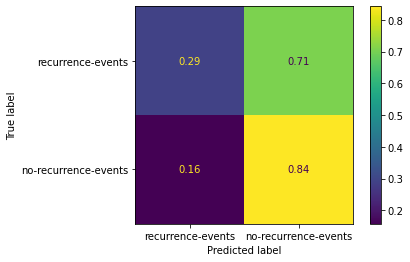

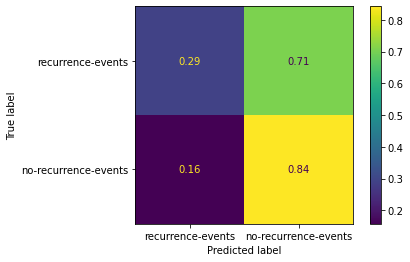

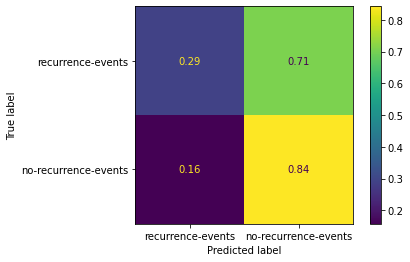

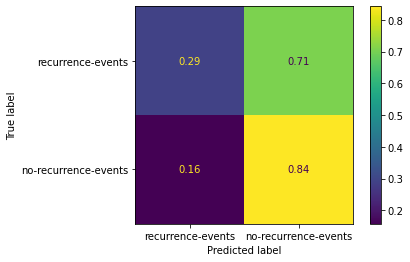

In [29]:

X,X_breast,X_age,X_breast_age,Y = reducedDatasets (X,Y)
X_train,Y_train,X_test,Y_test = splitDataset(X,Y,0.8)
X_train_a,Y_train_a,X_test_a,Y_test_a = splitDataset(X_age,Y,0.8)
X_train_b,Y_train_b,X_test_b,Y_test_b = splitDataset(X_breast,Y,0.8)
X_train_ab,Y_train_ab,X_test_ab,Y_test_ab = splitDataset(X_breast_age,Y,0.8)
clf = GaussianNB()
clf.fit(X_train, Y_train)
sk.metrics.plot_confusion_matrix(clf, X_test, Y_test,normalize='true', display_labels = cats['Class'])
clf = GaussianNB()
clf.fit(X_train_a, Y_train_a)
sk.metrics.plot_confusion_matrix(clf, X_test_a, Y_test_a,normalize='true', display_labels = cats['Class'])
clf = GaussianNB()
clf.fit(X_train_b, Y_train_b)
sk.metrics.plot_confusion_matrix(clf, X_test_b, Y_test_b,normalize='true', display_labels = cats['Class'])
clf = GaussianNB()
clf.fit(X_train_ab, Y_train_ab)
sk.metrics.plot_confusion_matrix(clf, X_test_ab, Y_test_ab,normalize='true', display_labels = cats['Class'])